## Alpha Diversity Plots

10/15/18: Using the results of the feature selection procedure (LASSO modeling, see AD_feature_selection), this workbook makes plots of AD results based on important features (soil, depth, and inundation)

**TODO:** 
1. Pick factors to show?
2. Model -> 2nd order / quadratic relationship as a function of 1 var? Not necessary to show as we already show that a multivariate model fits data better. 
3. 

From the LASSO analysis, we can see that two/three main drivers of AD are soiltype, depth, and inundation. We could show test set predictions of alpha diversity vs. actual data and then indicate inundation and soil category.
That's not  aterrible idea actually. 



In [15]:
# JG 11/15/17
# Updated 5/8/18

import pandas as pd
import numpy as np
import math
import scipy.stats as stats
import palettable

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline

In [16]:
# Import map and chao data:
map_df = pd.read_csv('../Metadata/ibp_metadata_2.6.18_version.txt', sep='\t')
chao1_data = '../Seq_data/vsearch/alpha/alpha_div_collated/chao1.txt'
chao1_df = pd.read_csv(chao1_data, sep='\t')

# Subset the last round, average all bootstrap iterations and delete the seq/sample and iteration columns
chao1_df = chao1_df.loc[100:]
average_chao1 = chao1_df.mean(axis=0)
average_chao1 = average_chao1[2:]

In [19]:
# Check avg-chao indices = mapdf row indices?

def subset_index(index1, filter_index):
    """Subsets index1 to only those values found in filter index and returns the new index.
    Only supports index by columns right now. General version needed? Would have options for rows, columns or index.
    Actually this works if you pass the correct options ahead of time. 
    """
    return [x for x in index1 if x in filter_index.values]
    
    
columns = subset_index(average_chao1.index, map_df['SampleID'])
average_chao1 = average_chao1[columns]


In [38]:
# Test - ANOVA w/ soil type

map_df['USDA_Soil Series'].value_counts()
# groupby soil series, then get #sampleID column values for each group
groups = map_df.groupby('USDA_Soil Series')
soil_AD = {}
for name, group in groups:
    samples = group['#SampleID'].values
    group_AD = average_chao1[samples]
    group_AD = [x for x in group_AD.values if not np.isnan(x)]    
    soil_AD[name] = group_AD

stats.f_oneway(soil_AD['Hoopeston fine sandy loam '], soil_AD['Watseka loamy fine sand '], soil_AD['Selma loam ']) 

dict_keys(['Hoopeston fine sandy loam ', 'Watseka loamy fine sand ', 'Selma loam '])


F_onewayResult(statistic=4.0227442392048092, pvalue=0.019335513776562282)

Text(0.5,0,'Depth (x 10 cm)')

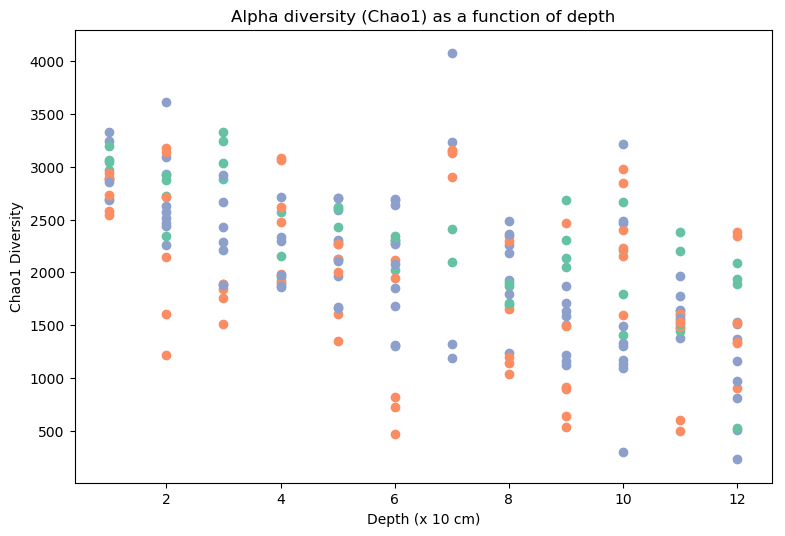

In [22]:
# AD vs depth, colored by soil series:

soiltype_dict = {'Hoopeston fine sandy loam ':sns.color_palette('Set2', 3)[0], 
                 'Watseka loamy fine sand ':sns.color_palette('Set2', 3)[1], 
                 'Selma loam ':sns.color_palette('Set2', 3)[2] }

f,ax = plt.subplots()
for i in average_chao1.items():
    if i[0].split('.')[0] != 'W11':
        if i[1] > 200:
            depth = i[0].split('.')[1]
            if len(depth) <4:
                depth = int(depth[1:])
                soil = map_df[ map_df['SampleID'] == i[0]] ['USDA_Soil Series'].values[0]
                if soil in soiltype_dict.keys():
                    ax.scatter(depth, i[1], c=soiltype_dict[soil])#, color = inundation)#, cmap=c_map)

ax.set_title('Alpha diversity (Chao1) as a function of depth')
ax.set_ylabel('Chao1 Diversity')
ax.set_xlabel('Depth (x 10 cm)')
#f.savefig('../output/chao1_ad_vs_depth.png')
    

Text(0.5,0,'Depth (x 10 cm)')

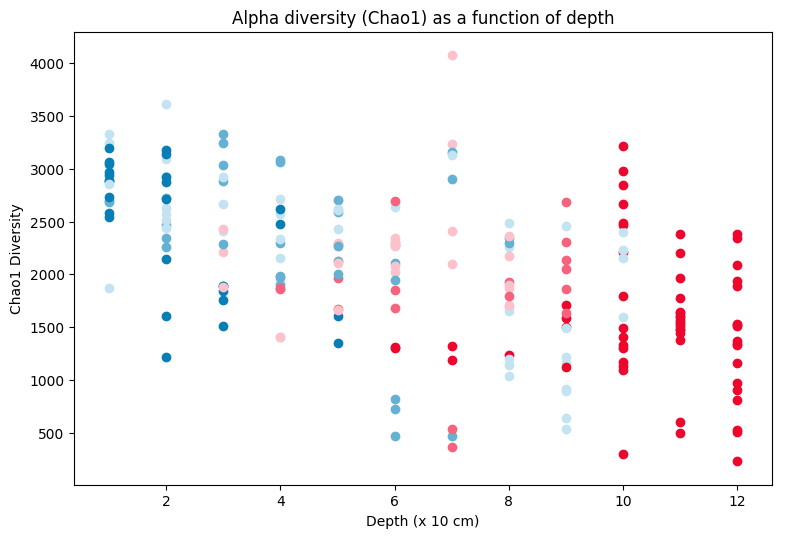

In [69]:
# Organize data by depth and inundation fraction:

cmap = ListedColormap(sns.diverging_palette(240, 10,s=99))


f, ax = plt.subplots()
for i in average_chao1.items():
    if i[0].split('.')[0] != 'W11':
        if i[1] > 200:
            depth = i[0].split('.')[1]
            if len(depth) <4:
                depth = int(depth[1:])
                inundation = map_df[ map_df['#SampleID'] == i[0]] ['Inundation_Frac'].values[0]
                ax.scatter(depth, i[1], c=cmap(inundation))#, color = inundation)#, cmap=c_map)

ax.set_title('Alpha diversity (Chao1) as a function of depth')
ax.set_ylabel('Chao1 Diversity')
ax.set_xlabel('Depth (x 10 cm)')
#f.savefig('../output/chao1_ad_vs_depth.png')
    

In [78]:
depth_list = []
inundation_list = []
chao1_list = []
for i in average_chao1.items():
    if i[0].split('.')[0] != 'W11':
        if i[1] > 200:
            depth = i[0].split('.')[1]
            if len(depth) < 4:
                depth_val = int(depth[1:])
                depth_list.append(depth_val)
                chao1_list.append(i[1])
                inundation_list.append(map_df[ map_df['#SampleID'] == i[0]] ['Inundation_Frac'].values[0])

sns.regplot(x=inundation_list, y=chao1_list, order=2)

TypeError: only integer scalar arrays can be converted to a scalar index

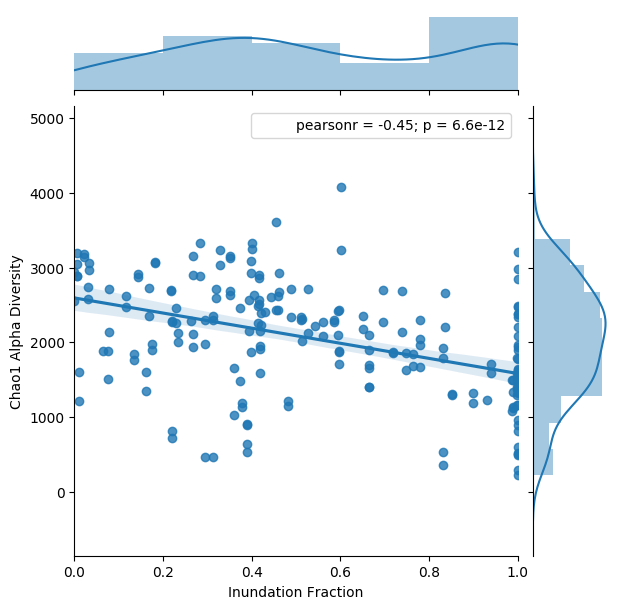

In [164]:
# Trying to redo this by inundation to see if it makes any sense to even show this?

chao_vals = []
inundation_vals = []

colors = sns.color_palette()
#f, ax = plt.subplots()
for i in average_chao1.items():
    if i[0].split('.')[0] != 'W11':
        if i[1] > 200:
            depth = i[0].split('.')[1]
            if len(depth) <4:
                depth = int(depth[1:])
                inundation = map_df[ map_df['#SampleID'] == i[0]] ['Inundation_Frac'].values[0]
                chao_vals.append(i[1])
                inundation_vals.append(inundation)
                #ax.scatter(inundation, i[1], c=colors[0])# c=cmap(inundation))#, color = inundation)#, cmap=c_map)
#ax.set_title('Alpha diversity (Chao1) as a function of inundation fraction')
#ax.set_ylabel('Chao1 Diversity')
#ax.set_xlabel('Inundation Fraction')
#ax.invert_yaxis()
f = sns.jointplot(x=np.asarray(inundation_vals), y=np.asarray(chao_vals), kind='reg', xlim=(0,1))
plt.xlabel('Inundation Fraction')
plt.ylabel('Chao1 Alpha Diversity')
f.savefig('./jointplot_ad_in.png')

In [2]:
# Import files: What is the full biom data used for?
map_df = pd.read_csv('../Metadata/ibp_metadata_4.17.18.txt', sep='\t')
#biom_test = pd.read_csv('../Seq_data/Updated_files/biom/Full_DADA_table/Full_DADA_IBP_transposed.txt', sep='\t', index_col=0)

#biom_v2 = pd.read_csv('../Seq_data/Updated_files/biom/IBP_mc10_ms5000_w_tax.txt', sep='\t', index_col=0, skiprows=1)

biom_v3 = biom_test.[biom_test.columns in biom_v2.columns]
biom_v2.columns
#biom_v3 = biom_test[biom_v2.columns]
#biom_v3